In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
trip_duration=pd.read_csv('train.csv')

In [3]:
trip_duration.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
trip_duration.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
trip_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


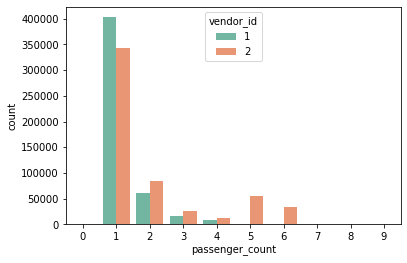

In [8]:
sns.countplot(x='passenger_count',data=trip_duration[trip_duration['trip_duration']<1000],hue='vendor_id',palette='Set2')

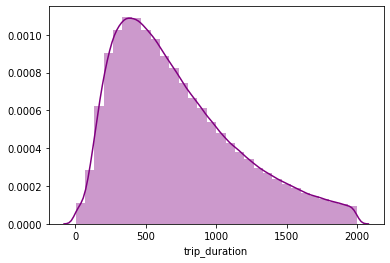

In [9]:
sns.distplot(trip_duration[trip_duration['trip_duration']<2000]['trip_duration'],bins=30,color='Purple')

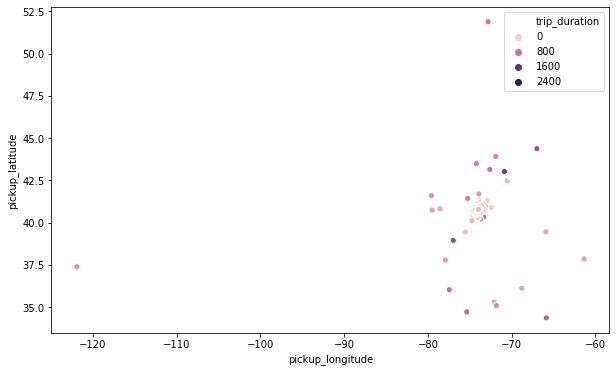

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pickup_longitude',y='pickup_latitude',data=trip_duration[trip_duration['trip_duration']<2000],hue='trip_duration')

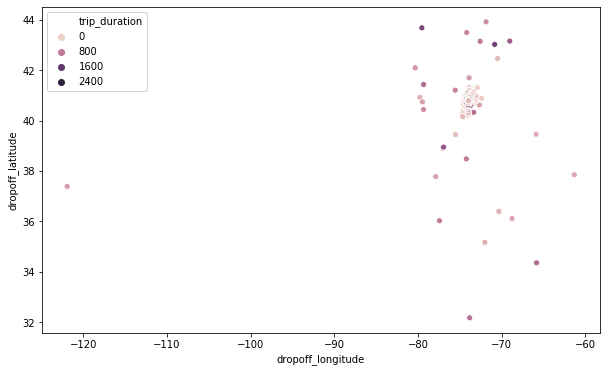

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='dropoff_longitude',y='dropoff_latitude',data=trip_duration[trip_duration['trip_duration']<2000],hue='trip_duration')

In [12]:
from datetime import datetime
trip_duration['pickup_datetime']=trip_duration['pickup_datetime'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [13]:
trip_duration['dropoff_datetime']=trip_duration['dropoff_datetime'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [14]:
trip_duration['pickup_month']=trip_duration['pickup_datetime'].apply(lambda date:date.month)

In [15]:
trip_duration['dropoff_month']=trip_duration['dropoff_datetime'].apply(lambda date:date.month)

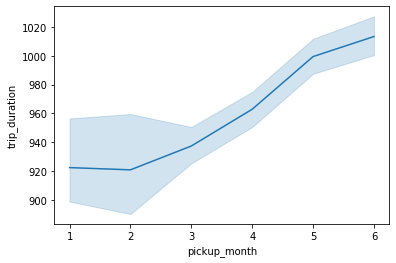

In [16]:
sns.lineplot(x='pickup_month',y='trip_duration',data=trip_duration)

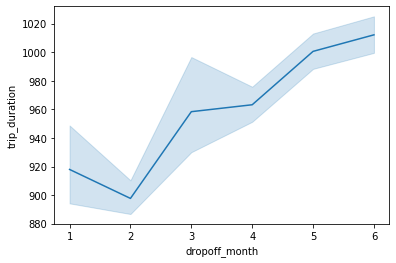

In [9]:
sns.lineplot(x='dropoff_month',y='trip_duration',data=trip_duration[trip_duration['dropoff_month']<=6])

In [17]:
trip_duration['pickup_hour']=trip_duration['pickup_datetime'].apply(lambda date:date.hour)

In [18]:
trip_duration['dropoff_hour']=trip_duration['dropoff_datetime'].apply(lambda date:date.hour)

In [19]:
store_fwd_flag = pd.get_dummies(trip_duration['store_and_fwd_flag'],drop_first=True)

In [20]:
trip_duration.drop('store_and_fwd_flag',axis=1,inplace=True)

In [21]:
trip_duration=pd.concat([trip_duration,store_fwd_flag],axis=1)

In [22]:
vendor_id = pd.get_dummies(trip_duration['vendor_id'],drop_first=True)

In [23]:
trip_duration.drop('vendor_id',axis=1,inplace=True)

In [24]:
trip_duration=pd.concat([trip_duration,vendor_id],axis=1)

In [25]:
passenger_count = pd.get_dummies(trip_duration['passenger_count'],drop_first=True)

In [26]:
trip_duration.drop('passenger_count',axis=1,inplace=True)

In [27]:
trip_duration=pd.concat([trip_duration,passenger_count],axis=1)

In [22]:
trip_duration.head() 

,id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,dropoff_month,...,2,1,2,3,4,5,6,7,8,9
0,id2875421,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982155,40.767937,-73.964630,40.765602,455,3,3,...,1,1,0,0,0,0,0,0,0,0
1,id2377394,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980415,40.738564,-73.999481,40.731152,663,6,6,...,0,1,0,0,0,0,0,0,0,0
2,id3858529,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979027,40.763939,-74.005333,40.710087,2124,1,1,...,1,1,0,0,0,0,0,0,0,0
3,id3504673,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010040,40.719971,-74.012268,40.706718,429,4,4,...,1,1,0,0,0,0,0,0,0,0
4,id2181028,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973053,40.793209,-73.972923,40.782520,435,3,3,...,1,1,0,0,0,0,0,0,0,0


In [25]:
print(trip_duration['pickup_month'].corr(trip_duration['dropoff_month']))

0.9999362309647805


In [28]:
print(trip_duration['pickup_hour'].corr(trip_duration['dropoff_hour']))

0.9339773757926985


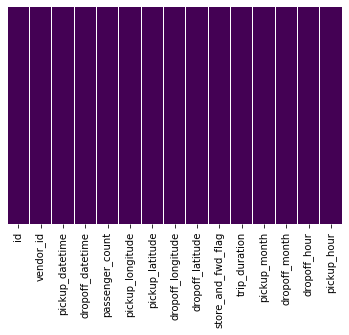

In [13]:
sns.heatmap(trip_duration.isnull(),yticklabels=False,cbar=False,cmap='viridis')

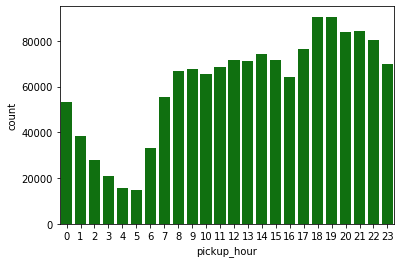

In [34]:
sns.countplot(x='pickup_hour',data=trip_duration,color='Green')

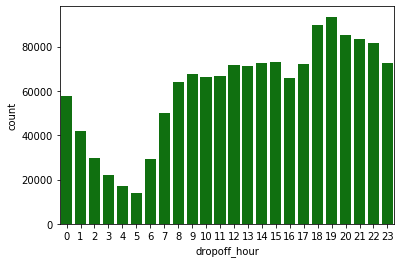

In [35]:
sns.countplot(x='dropoff_hour',data=trip_duration,color='Green')

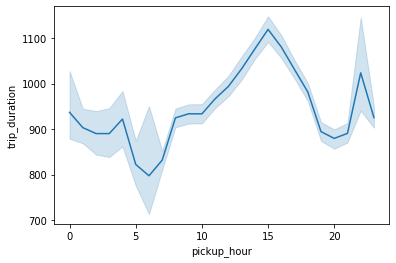

In [36]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=trip_duration)

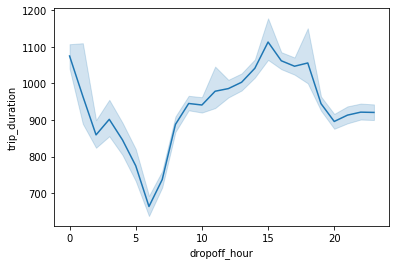

In [37]:
sns.lineplot(x='dropoff_hour',y='trip_duration',data=trip_duration)

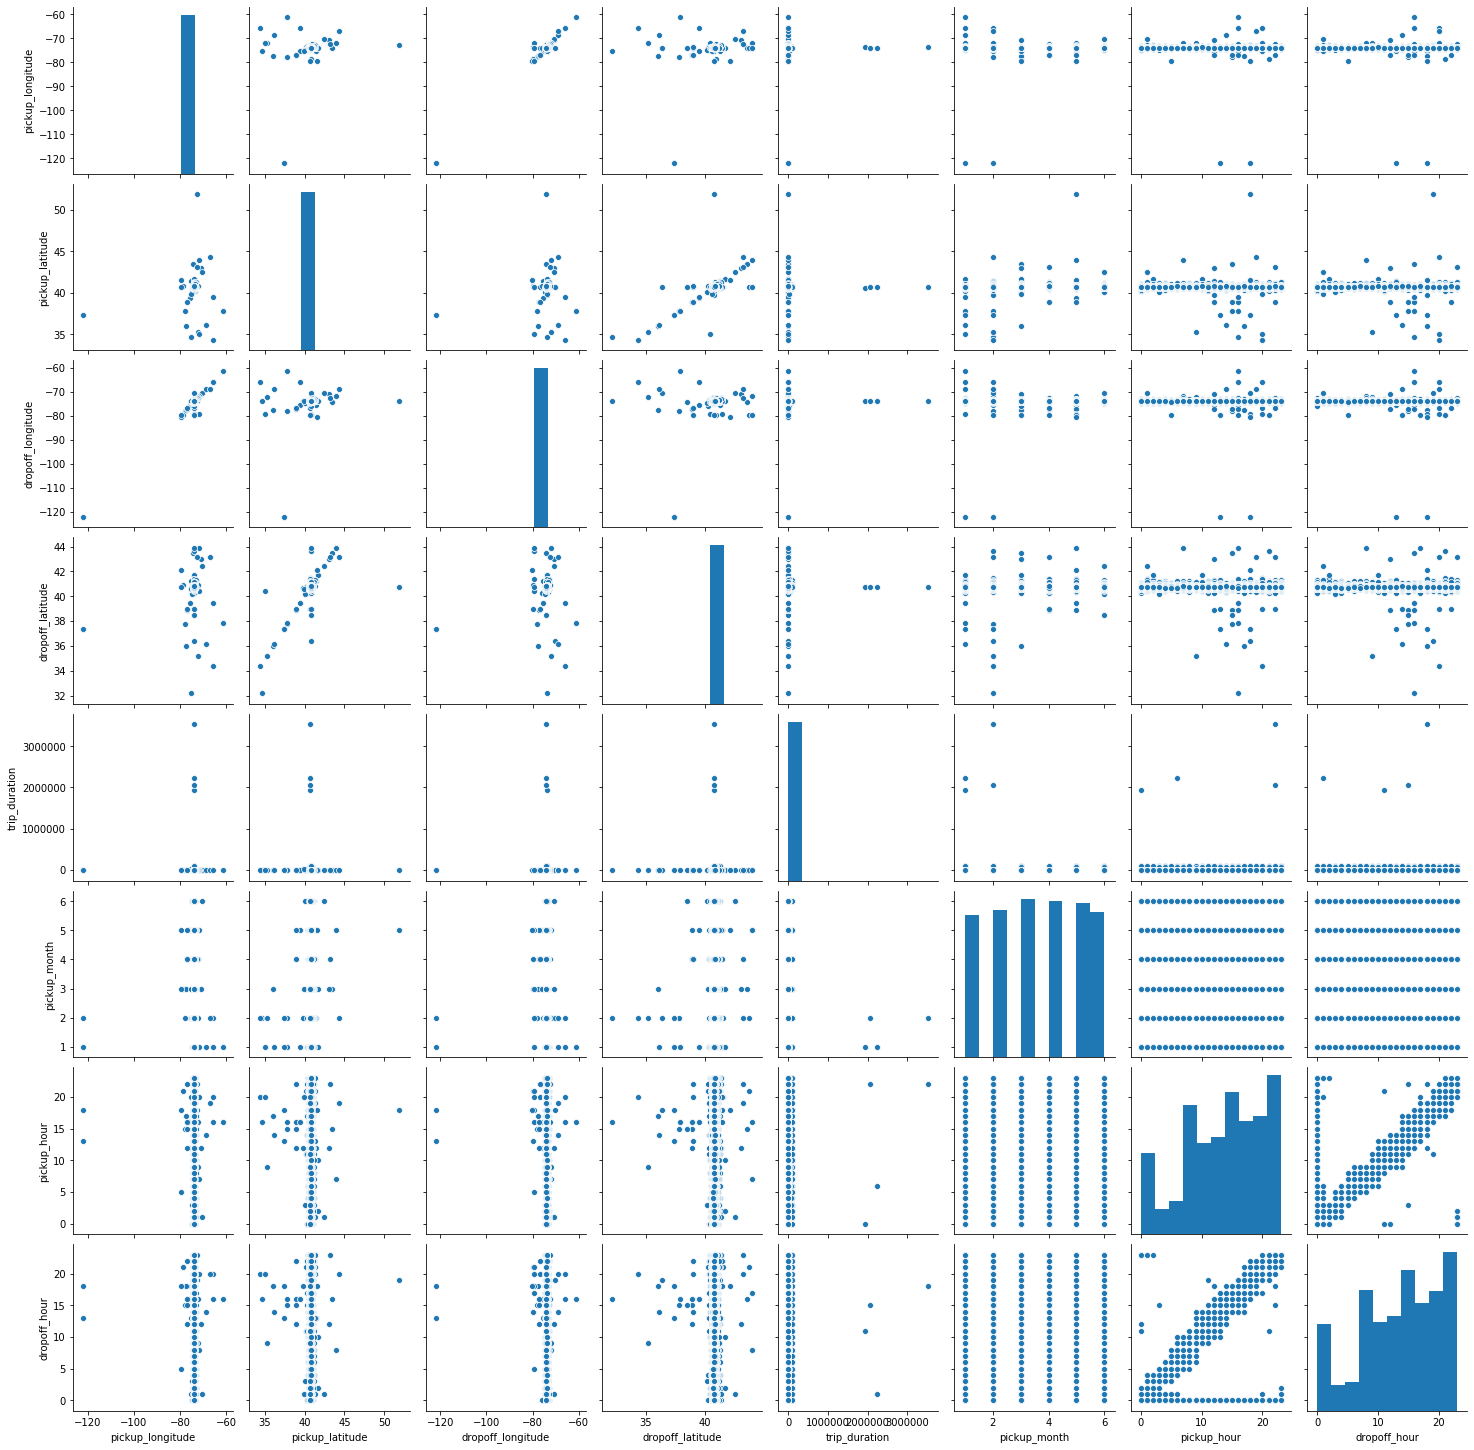

In [41]:
sns.pairplot(trip_duration.drop(['vendor_id','id','pickup_datetime','dropoff_datetime','dropoff_month','passenger_count'],axis=1))

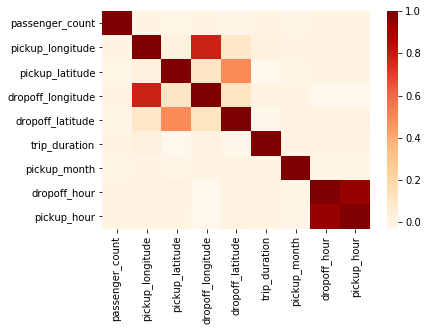

In [16]:
sns.heatmap(trip_duration.drop(['vendor_id','id','pickup_datetime','dropoff_datetime','dropoff_month'],axis=1).corr(),cmap='OrRd')

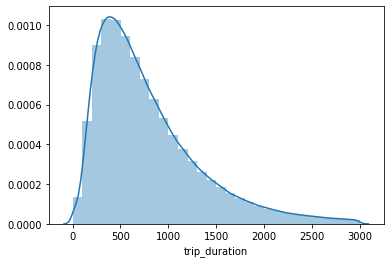

In [12]:
sns.distplot(trip_duration[trip_duration['trip_duration']<3000]['trip_duration'],bins=30)

array([2, 1], dtype=int64)

In [28]:
trip_modified=trip_duration[trip_duration['trip_duration']<7000]

In [46]:
trip_modified.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,dropoff_month,pickup_hour
count,1.456374e+06,1.456374e+06,1.456374e+06,1.456374e+06,1.456374e+06,1.456374e+06,1.456374e+06,1.456374e+06,1.456374e+06,1.456374e+06
mean,1.534286e+00,1.663935e+00,-7.397350e+01,4.075093e+01,-7.397342e+01,4.075180e+01,8.360020e+02,3.516699e+00,3.517007e+00,1.360647e+01
std,4.988233e-01,1.313615e+00,7.090054e-02,3.285709e-02,7.063389e-02,3.587275e-02,6.539621e+02,1.681035e+00,1.681205e+00,6.399516e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073736e+01,-7.399133e+01,4.073589e+01,3.970000e+02,2.000000e+00,2.000000e+00,9.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075411e+01,-7.397975e+01,4.075453e+01,6.610000e+02,4.000000e+00,4.000000e+00,1.400000e+01
75%,2.000000e+00,2.000000e+00,-7.396734e+01,4.076836e+01,-7.396302e+01,4.076981e+01,1.073000e+03,5.000000e+00,5.000000e+00,1.900000e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,6.985000e+03,6.000000e+00,7.000000e+00,2.300000e+01


In [29]:
X=trip_modified.drop(['id','trip_duration','pickup_datetime','dropoff_longitude','dropoff_latitude','dropoff_datetime','dropoff_month','dropoff_hour'],axis=1)
y=trip_modified['trip_duration']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [32]:
X

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_hour,dropoff_hour
0,1,-73.982155,40.767937,-73.964630,40.765602,3,17,17
1,1,-73.980415,40.738564,-73.999481,40.731152,6,0,0
2,1,-73.979027,40.763939,-74.005333,40.710087,1,11,12
3,1,-74.010040,40.719971,-74.012268,40.706718,4,19,19
4,1,-73.973053,40.793209,-73.972923,40.782520,3,13,13
...,...,...,...,...,...,...,...,...
1458639,4,-73.982201,40.745522,-73.994911,40.740170,4,13,13
1458640,1,-74.000946,40.747379,-73.970184,40.796547,1,7,7
1458641,1,-73.959129,40.768799,-74.004433,40.707371,4,6,7
1458642,1,-73.982079,40.749062,-73.974632,40.757107,1,15,16


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
X_train= scaler.fit_transform(X_train)

In [35]:
X_test = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [28]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print(lm.intercept_)

-45590.157472253624


In [30]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
pickup_longitude,88862.936021
pickup_latitude,-70160.094808
pickup_month,112.274547
pickup_hour,67.588522
Y,220.817385
2,9.507439
1,659.905398
2,706.075899
3,696.317657
4,714.549536


In [31]:
prediction = lm.predict(X_test)

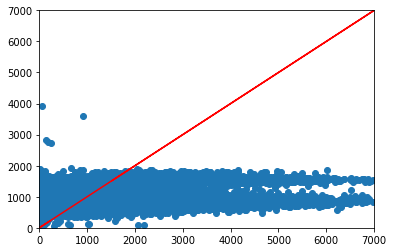

In [34]:
plt.scatter(y_test,prediction)
plt.ylim(0,7000)
plt.xlim(0,7000)
plt.plot(y_test,y_test,'r')

In [35]:
X_train.shape

(975770, 15)

In [36]:
X_test.shape

(480604, 15)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [39]:
model = Sequential()

model.add(Dense(15,activation='relu'))
model.add(Dense(6,activation='relu'))
#model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [42]:
model.fit(x=X_train, 
          y=y_train.values, 
          epochs=600,
          validation_data=(X_test, y_test.values), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
30493/30493 [==============================] - 73s 2ms/step - loss: 440163.1250 - val_loss: 427054.8125
Epoch 2/600
30493/30493 [==============================] - 70s 2ms/step - loss: 423297.5000 - val_loss: 425446.2188
Epoch 3/600
30493/30493 [==============================] - 70s 2ms/step - loss: 421515.6562 - val_loss: 423776.3750
Epoch 4/600
30493/30493 [==============================] - 66s 2ms/step - loss: 420248.3438 - val_loss: 423242.0312
Epoch 5/600
30493/30493 [==============================] - 67s 2ms/step - loss: 419751.9688 - val_loss: 422819.9062
Epoch 6/600
30493/30493 [==============================] - 68s 2ms/step - loss: 419573.4688 - val_loss: 422556.6250
Epoch 7/600
30493/30493 [==============================] - 247s 8ms/step - loss: 419529.0625 - val_loss: 422742.8438
Epoch 8/600
30493/30493 [==============================] - 72s 2ms/step - loss: 419473.5000 - val_loss: 422611.1875
Epoch 9/600
30493/30493 [==============================] - 39s 1ms/step

Epoch 71/600
30493/30493 [==============================] - 40s 1ms/step - loss: 371865.9688 - val_loss: 390198.4062
Epoch 72/600
30493/30493 [==============================] - 45s 1ms/step - loss: 371216.9375 - val_loss: 407296.9375
Epoch 73/600
30493/30493 [==============================] - 42s 1ms/step - loss: 370217.0312 - val_loss: 373919.2812
Epoch 74/600
30493/30493 [==============================] - 38s 1ms/step - loss: 369840.6875 - val_loss: 372614.7188
Epoch 75/600
30493/30493 [==============================] - 37s 1ms/step - loss: 369271.2812 - val_loss: 370696.5625
Epoch 76/600
30493/30493 [==============================] - 39s 1ms/step - loss: 368934.2188 - val_loss: 369305.3750
Epoch 77/600
30493/30493 [==============================] - 38s 1ms/step - loss: 368203.7500 - val_loss: 369102.1562
Epoch 78/600
30493/30493 [==============================] - 42s 1ms/step - loss: 367915.9062 - val_loss: 367870.6875
Epoch 79/600
30493/30493 [==============================] - 42s 

In [39]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=150)

Epoch 1/100
7624/7624 [==============================] - 17s 2ms/step - loss: 466853.0312 - val_loss: 427181.4062
Epoch 2/100
7624/7624 [==============================] - 17s 2ms/step - loss: 424112.3438 - val_loss: 427134.9375
Epoch 3/100
7624/7624 [==============================] - 17s 2ms/step - loss: 423950.3750 - val_loss: 427084.0938
Epoch 4/100
7624/7624 [==============================] - 18s 2ms/step - loss: 423634.8125 - val_loss: 426567.5312
Epoch 5/100
7624/7624 [==============================] - 18s 2ms/step - loss: 423377.4688 - val_loss: 426632.3750
Epoch 6/100
7624/7624 [==============================] - 18s 2ms/step - loss: 423247.0938 - val_loss: 426418.6562
Epoch 7/100
7624/7624 [==============================] - 17s 2ms/step - loss: 423192.2812 - val_loss: 426382.8438
Epoch 8/100
7624/7624 [==============================] - 18s 2ms/step - loss: 423142.7812 - val_loss: 426339.9688
Epoch 9/100
7624/7624 [==============================] - 18s 2ms/step - loss: 423129.937

In [43]:
losses = pd.DataFrame(model.history.history)

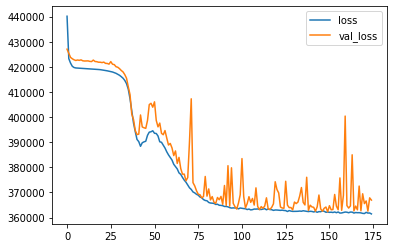

In [44]:
losses.plot()

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [46]:
predictions = model.predict(X_test)

In [47]:
mean_absolute_error(y_test,predictions)

443.3278885367743

In [48]:
np.sqrt(mean_squared_error(y_test,predictions))

605.7807769336464

In [49]:
explained_variance_score(y_test,predictions)

0.14820210018290758

In [50]:
predictions

array([[ 651.4637 ],
       [ 826.226  ],
       [1762.8575 ],
       ...,
       [ 800.2519 ],
       [ 867.5015 ],
       [ 815.95935]], dtype=float32)

(0, 4000)

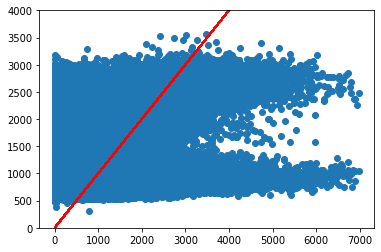

In [53]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.ylim(0,4000)
#plt.xlim(0,10000)

In [15]:
X=trip_modified.drop(['vendor_id','id','trip_duration','store_and_fwd_flag','pickup_datetime','dropoff_datetime'],axis=1)
y=trip_modified['trip_duration']

In [25]:
print(lm.intercept_)

-43916.47593367938


In [26]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
passenger_count,45.001814
pickup_longitude,81745.141660
pickup_latitude,-18081.944514
dropoff_longitude,5320.342224
dropoff_latitude,-17441.459584
pickup_month,-1823.948988
dropoff_month,2286.623536
pickup_hour,23.027487
dropoff_hour,44.793677


In [27]:
predictions = lm.predict(X_test)

(0, 3000)

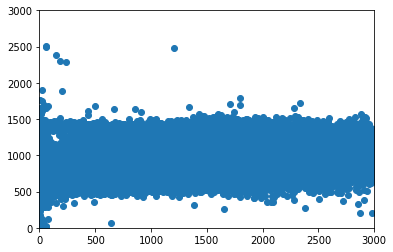

In [32]:
plt.scatter(y_test,predictions)
plt.ylim(0,3000)
plt.xlim(0,3000)

In [56]:
trip_duration[(trip_duration['trip_duration']>60000) & (trip_duration['trip_duration']<70000)].count()

id                    25
vendor_id             25
pickup_datetime       25
dropoff_datetime      25
passenger_count       25
pickup_longitude      25
pickup_latitude       25
dropoff_longitude     25
dropoff_latitude      25
store_and_fwd_flag    25
trip_duration         25
pickup_month          25
dropoff_month         25
pickup_hour           25
dropoff_hour          25
dtype: int64

In [57]:
trip_duration[trip_duration['trip_duration']>70000].count()

id                    1936
vendor_id             1936
pickup_datetime       1936
dropoff_datetime      1936
passenger_count       1936
pickup_longitude      1936
pickup_latitude       1936
dropoff_longitude     1936
dropoff_latitude      1936
store_and_fwd_flag    1936
trip_duration         1936
pickup_month          1936
dropoff_month         1936
pickup_hour           1936
dropoff_hour          1936
dtype: int64

In [58]:
trip_duration.count()

id                    1458644
vendor_id             1458644
pickup_datetime       1458644
dropoff_datetime      1458644
passenger_count       1458644
pickup_longitude      1458644
pickup_latitude       1458644
dropoff_longitude     1458644
dropoff_latitude      1458644
store_and_fwd_flag    1458644
trip_duration         1458644
pickup_month          1458644
dropoff_month         1458644
pickup_hour           1458644
dropoff_hour          1458644
dtype: int64

In [59]:
trip_duration[trip_duration['trip_duration']>70000].count()/trip_duration.count()

id                    0.001327
vendor_id             0.001327
pickup_datetime       0.001327
dropoff_datetime      0.001327
passenger_count       0.001327
pickup_longitude      0.001327
pickup_latitude       0.001327
dropoff_longitude     0.001327
dropoff_latitude      0.001327
store_and_fwd_flag    0.001327
trip_duration         0.001327
pickup_month          0.001327
dropoff_month         0.001327
pickup_hour           0.001327
dropoff_hour          0.001327
dtype: float64

In [60]:
df_trip=trip_duration[trip_duration['trip_duration']<70000]

In [61]:
X=df_trip.drop(['vendor_id','id','trip_duration','store_and_fwd_flag','pickup_datetime','dropoff_datetime'],axis=1)
y=df_trip['trip_duration']

In [62]:
df_trip.count()

id                    1456708
vendor_id             1456708
pickup_datetime       1456708
dropoff_datetime      1456708
passenger_count       1456708
pickup_longitude      1456708
pickup_latitude       1456708
dropoff_longitude     1456708
dropoff_latitude      1456708
store_and_fwd_flag    1456708
trip_duration         1456708
pickup_month          1456708
dropoff_month         1456708
pickup_hour           1456708
dropoff_hour          1456708
dtype: int64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [90]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [91]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
print(lm.intercept_)

-32890.19377868291


In [78]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
passenger_count,66.140657
pickup_longitude,121488.536519
pickup_latitude,-34286.496139
dropoff_longitude,-35705.909665
dropoff_latitude,-17682.014864
pickup_month,-3000.961619
dropoff_month,3738.546218
pickup_hour,42.228208
dropoff_hour,20.047945


In [79]:
predictions = lm.predict(X_test)

(0, 70000)

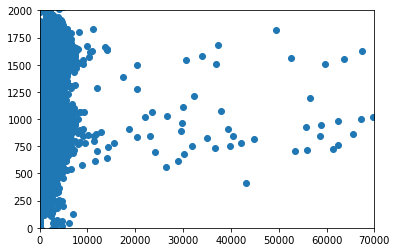

In [80]:
plt.scatter(y_test,predictions)
plt.ylim(0,2000)
plt.xlim(0,70000)

In [82]:
X

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,dropoff_month,pickup_hour,dropoff_hour
0,1,-73.982155,40.767937,-73.964630,40.765602,3,3,17,17
1,1,-73.980415,40.738564,-73.999481,40.731152,6,6,0,0
2,1,-73.979027,40.763939,-74.005333,40.710087,1,1,11,12
3,1,-74.010040,40.719971,-74.012268,40.706718,4,4,19,19
4,1,-73.973053,40.793209,-73.972923,40.782520,3,3,13,13
...,...,...,...,...,...,...,...,...,...
1458639,4,-73.982201,40.745522,-73.994911,40.740170,4,4,13,13
1458640,1,-74.000946,40.747379,-73.970184,40.796547,1,1,7,7
1458641,1,-73.959129,40.768799,-74.004433,40.707371,4,4,6,7
1458642,1,-73.982079,40.749062,-73.974632,40.757107,1,1,15,16


In [83]:
X=X.drop(['dropoff_month','dropoff_hour'],axis=1)

In [84]:
X

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_hour
0,1,-73.982155,40.767937,-73.964630,40.765602,3,17
1,1,-73.980415,40.738564,-73.999481,40.731152,6,0
2,1,-73.979027,40.763939,-74.005333,40.710087,1,11
3,1,-74.010040,40.719971,-74.012268,40.706718,4,19
4,1,-73.973053,40.793209,-73.972923,40.782520,3,13
...,...,...,...,...,...,...,...
1458639,4,-73.982201,40.745522,-73.994911,40.740170,4,13
1458640,1,-74.000946,40.747379,-73.970184,40.796547,1,7
1458641,1,-73.959129,40.768799,-74.004433,40.707371,4,6
1458642,1,-73.982079,40.749062,-73.974632,40.757107,1,15


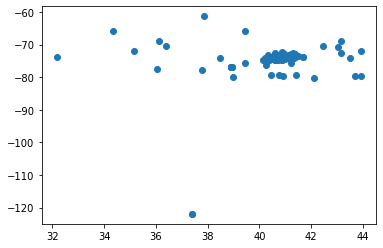

In [85]:
plt.scatter(X['dropoff_latitude'],X['dropoff_longitude'])

In [86]:
X[X['dropoff_longitude']<-120]

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_hour
1068810,2,-121.933235,37.389297,-121.933205,37.389103,1,18
1184454,2,-121.933342,37.389381,-121.933304,37.389511,2,13


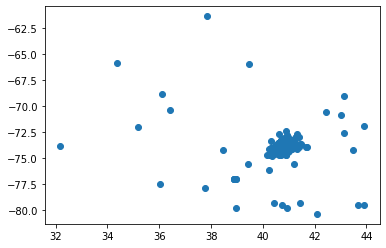

In [88]:
plt.scatter(X[X['dropoff_longitude']>-110]['dropoff_latitude'],X[X['dropoff_longitude']>-110]['dropoff_longitude'])

In [93]:
print(lm.intercept_)

-32905.889883053795


In [94]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
passenger_count,66.014821
pickup_longitude,121551.225805
pickup_latitude,-34291.692568
dropoff_longitude,-35741.213350
dropoff_latitude,-17685.477410
pickup_month,114.582655
pickup_hour,62.139473


In [95]:
predictions = lm.predict(X_test)

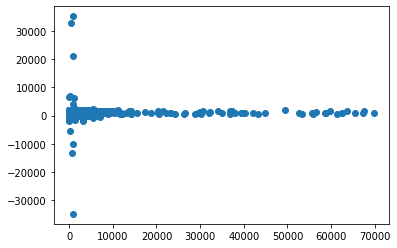

In [96]:
plt.scatter(y_test,predictions)

In [98]:
y_test.max()

69732

In [99]:
predictions.max()

35269.560609537

In [100]:
y_train.max()

69668